In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import exp, pi
from numpy.fft import*

## Problema 1

In [2]:
def DFT(y, N):
    N = len(y)
    c = np.zeros(N,complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

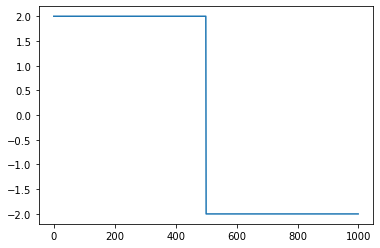

In [3]:
#a)
N = 1000 
y = []
temp = 0
while(temp<500):
    y.append(2)
    temp += 1
temp = 0
while(temp<500):
    y.append(-2)
    temp += 1
    
plt.plot(y)

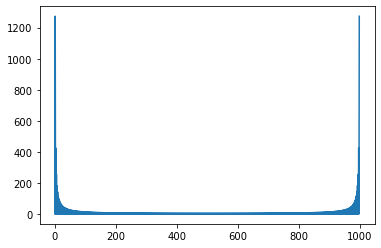

In [4]:
c = DFT(y, N)
plt.plot(abs(c))

In [5]:
#b)
def yn(n, N):
    return np.sin(pi*n/N)*np.sin(10*pi*n/N)

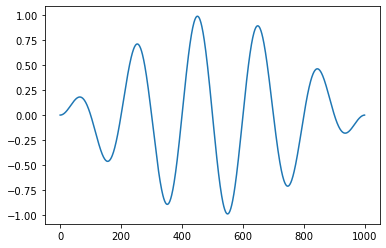

In [6]:
y = []
N = 1000

for n in range(N):
    temp = yn(n, N)
    y.append(temp)
    
plt.plot(y)

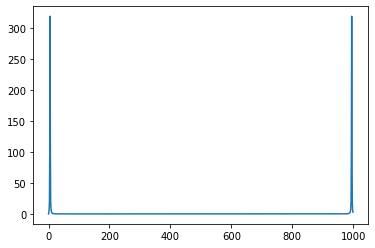

In [7]:
c = DFT(y, N)
plt.plot(abs(c))

## Problema 2

In [8]:
#a)
dados = np.loadtxt("sunspots.txt", dtype = float, delimiter= " ")
N =len(dados)

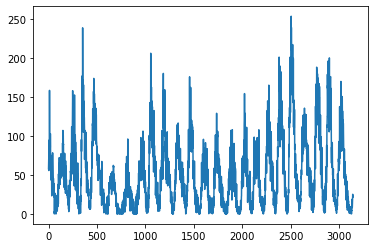

In [9]:
mes, manchas = [], []
for i in range(N):
    mes.append(dados[i][0])
    manchas.append(dados[i][1])
plt.plot(mes, manchas)

(0.0, 500.0)

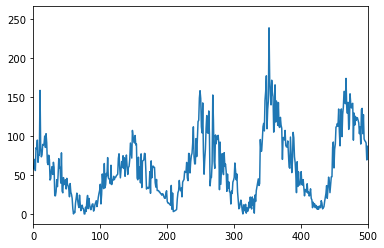

In [10]:
plt.plot(mes, manchas)
plt.xlim(0,500)

In [11]:
T = 500/4
T # a estimativa é de que o comprimento do ciclo em meses é de 125 meses

125.0

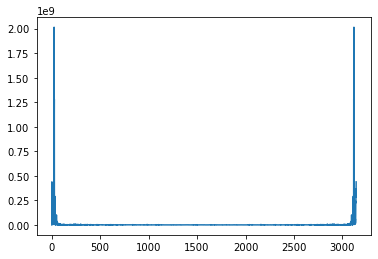

In [12]:
#b)
c = DFT(manchas, N)
ck = []
for i in range(N):
    if(i==0):
        ck.append(0)
    else:
        ck.append((abs(c[i]))**2)
ck = np.array(ck)
plt.plot(ck)

In [13]:
#c) #f=k/L
# analizando o gráfico percebemso que tem um pico entre 0 á 200, e outro está entre 3000 e N
#porém como há espelhamento considera apenas o primeiro
temp = 0
k = 0
for i in range(0, 200):
    if(ck[i]>temp):
        temp = ck[i]
        k = i
        
# Como N é dado em meses e não em segundos, então temos que multiplicar por um fator de 30*24*3600 para transformar para Hz

f = k/(N*30*24*3600)
print(f,"Hz")
T = N/k
print("Período é de", T, "meses")

2.9459940373080684e-09 Hz
Período é de 130.95833333333334 meses


## Problema 3

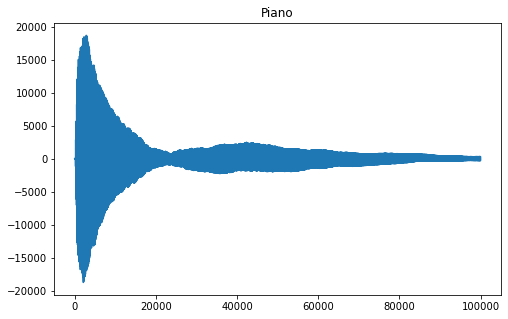

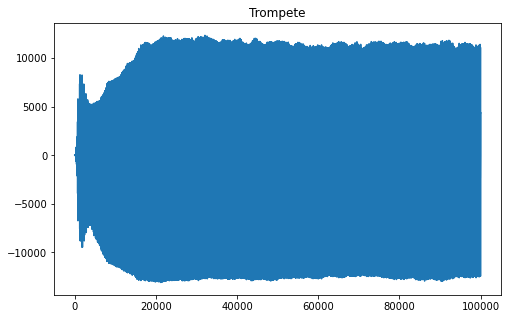

In [14]:
#a)
piano = np.loadtxt("piano.txt", float)
trompet = np.loadtxt("trumpet.txt", float)

plt.figure(figsize=(8,5))
plt.title("Piano")
plt.plot(piano)

plt.figure(figsize=(8,5))
plt.title("Trompete")
plt.plot(trompet)

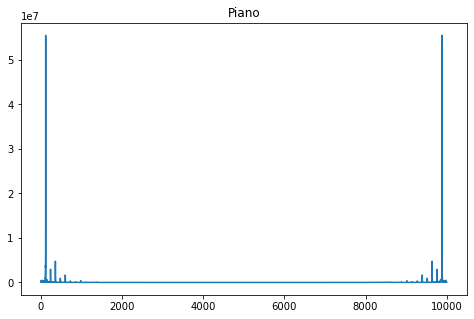

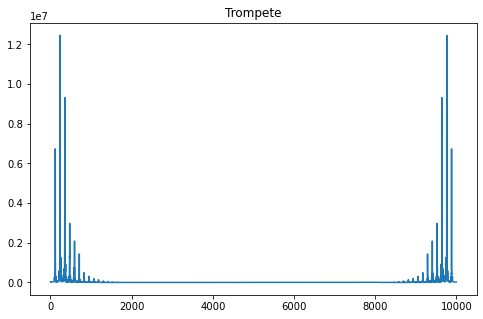

In [15]:
N = 10000
piano2 =  []
trompet2 = []

for i in range(N):
    piano2.append(piano[i])
    trompet2.append(trompet[i])

piano2 = np.array(piano2)
trompet2 = np.array(trompet2)

c_p = fft(piano2)
c_t = fft(trompet2)

plt.figure(figsize=(8,5))
plt.title("Piano")
plt.plot(abs(c_p))

plt.figure(figsize=(8,5))
plt.title("Trompete")
plt.plot(abs(c_t))

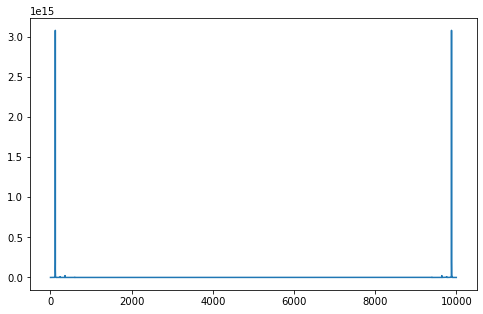

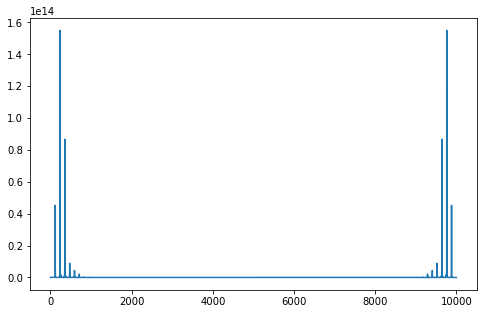

In [16]:
#b)
ck_p = []
ck_t = []
for i in range(N):
    if(i==0):
        ck_p.append(0)
    else:
        ck_p.append((abs(c_p[i]))**2)
ck_p= np.array(ck_p)

for i in range(N):
    if(i==0):
        ck_t.append(0)
    else:
        ck_t.append((abs(c_t[i]))**2)
        
ck_p= np.array(ck_p)
ck_t= np.array(ck_t)

plt.figure(figsize=(8,5))
plt.plot(ck_p)
plt.figure(figsize=(8,5))
plt.plot(ck_t)

In [17]:
# Como 44100 amostras foram gravadas em 1 segundo, então 100000 é 2.2675737 segundo
temp = 0
k_p = 0
k_t = 0
for i in range(0, 2000):
    if(ck_p[i]>temp):
        temp = ck_p[i]
        k_p = i

temp = 0
for i in range(0, 2000):
    if(ck_t[i]>temp):
        temp = ck_t[i]
        k_t = i
        
f_p = k_p/2.2675737
f_t = k_t/2.2675737
f_t, f_p

(104.07599982307082, 52.4789999107857)

O piano está tocando a nota Sol sustenido de primeira oitava e o trompete a nota Sol sistenido de segunda oitava.

## Problema 4

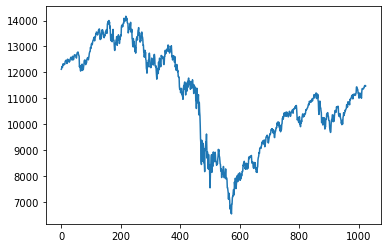

In [18]:
#a)
dados = np.loadtxt("dow.txt", float)
plt.plot(dados)
N = len(dados)

In [19]:
#b)
c = rfft(dados)
N2 = len(c)

In [20]:
#c)
c2 = np.zeros(N2, complex)
for i in range(N2*10//100):
    c2[i] = c[i]

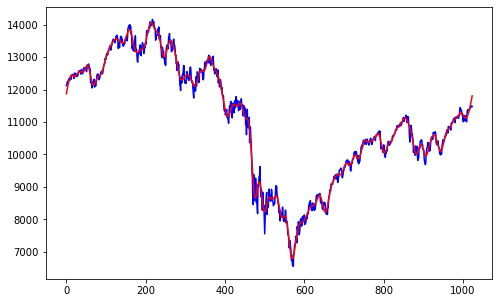

In [21]:
#d)
c3 = irfft(c2)
plt.figure(figsize=(8,5))
plt.plot(dados, 'b') #Original
plt.plot(c3, 'r') #sinal suavizado

Quando vc faz esse processo, é possível recuperar o gráfico até certo grau o gráfico original.

In [22]:
#e)
c4 = np.zeros(N2, complex)
for i in range(N2*2//100):
    c4[i] = c[i]

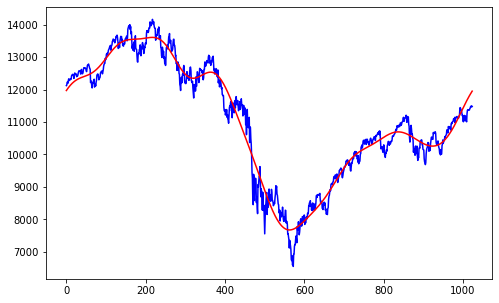

In [23]:
c5 = irfft(c4)
plt.figure(figsize=(8,5))
plt.plot(dados, "b") #Original
plt.plot(c5, "r") #sinal suavizado

## Problema 5

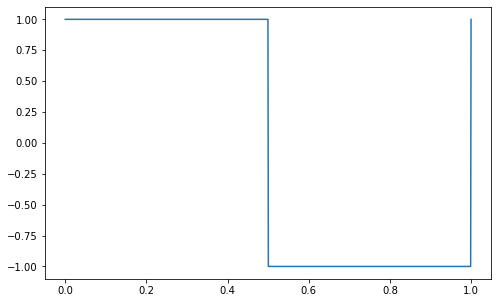

In [24]:
N = 1000
t = np.linspace(0, 1, 1000)
y = []

for i in range(N):
    if((4*t[i]//2)%2==0):
        y.append(1)
    else:
        y.append(-1)
y = np.array(y)

plt.figure(figsize=(8,5))
plt.plot(t, y)

In [25]:
c = rfft(y)
N2 = len(c)
c2 = np.zeros(N2, complex)

for i in range(10):
    c2[i] = c[i]
    
c_i = irfft(c2)

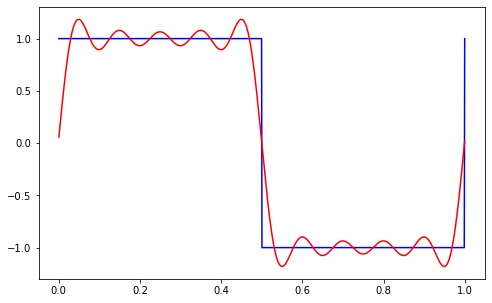

In [26]:
plt.figure(figsize=(8,5))
plt.plot(t, y, "b")
plt.plot(t, c_i, "r")

Esses arfatos surgem pelo descartamento dos coeficientes, e isso causa uma imprecisão como pode ser visot no gráfico acima, caso queria que o resultado seja muito próximo do original basta usar mais coeficientes apra calcular a inversa.

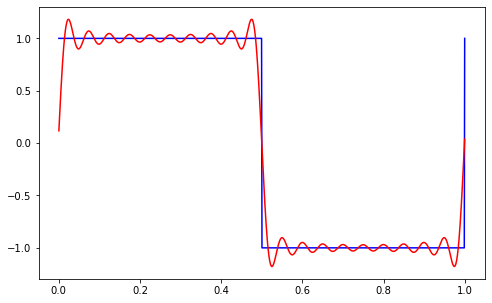

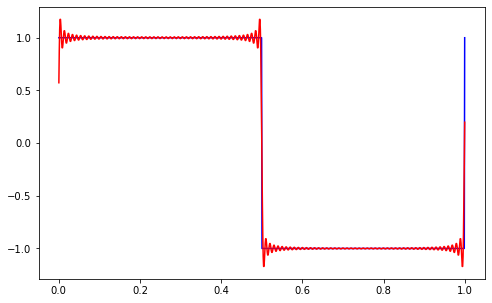

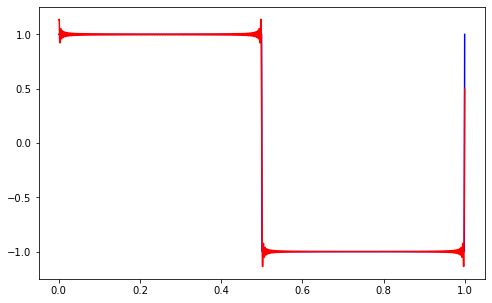

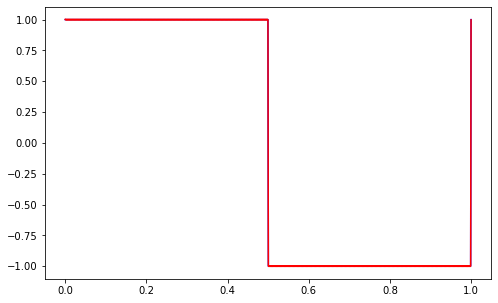

In [27]:
n = [20, 100, 250, 499]
for i in range(4):
    c2 = np.zeros(N2, complex)
    
    for j in range(n[i]):
        c2[j] = c[j]
    c_i = irfft(c2)
    plt.figure(figsize=(8,5))
    plt.plot(t, y, "b")
    plt.plot(t, c_i, "r")

Assim é perceptível, que quanto mais coeficientes forem utilizados menos artefatos terá o sinal suavizados, porém menos suavizados ele fica.

## Problema 6

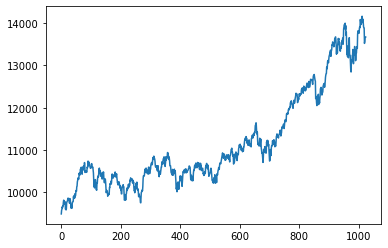

In [28]:
#a)
dados = np.loadtxt("dow2.txt")
plt.plot(dados)

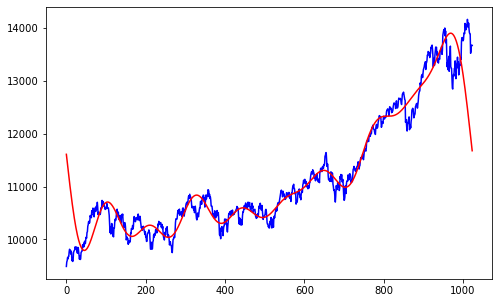

In [29]:
c = rfft(dados)
N = len(c)
c2 = np.zeros(N, complex)

for i in range(N*2//100):
    c2[i] = c[i]
    
c_i = irfft(c2)

plt.figure(figsize=(8,5))
plt.plot(dados, "b") #Original
plt.plot(c_i, "r") #sinal suavizado

In [30]:
#b)
from dcst import dct, idct

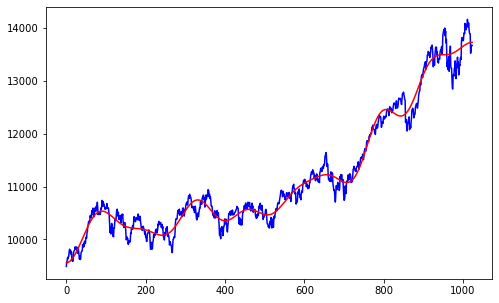

In [31]:
ck = dct(dados)
N2 = len(ck)
c3 = np.zeros(N2, complex)

for i in range(N2*2//100):
    c3[i] = ck[i]
    
c_i2 = idct(c3)

plt.figure(figsize=(8,5))
plt.plot(dados, "b") #Original
plt.plot(c_i2, "r") #sinal suavizado